## Code from online, has to be adapted for trees as in graph theory

In [6]:
class Solution:
   def solve(self, matrix):
      ans = 0
      twos = []
      for i in range(len(matrix)):
         for j in range(len(matrix[0])):
            if matrix[i][j] == 2:
               twos.append((i, j))
      while twos:
         temp = []
         for i, j in twos:
            for x, y in [(i + 1, j), (i, j + 1), (i - 1, j), (i, j - 1)]:
               if 0 <= x < len(matrix) and 0 <= y < len(matrix[0]) and matrix[x][y] == 1:
                  temp.append((x, y))
         for i, j in temp:
            matrix[i][j] = 2
         twos = temp
         ans += 1 if twos else 0

      ones = sum(int(matrix[i][j] == 1) for i in range(len(matrix)) for j in range(len(matrix[0])))
      return ans if ones == 0 else -1

ob = Solution()


#### Example for the above code:

In [7]:
# Test cases
print(ob.solve([
    [2, 1, 0, 2, 1],
    [1, 0, 1, 2, 1],
    [1, 0, 0, 2, 1]
]))  # Expected output: 2

print(ob.solve([
    [2, 1, 1, 0, 1],
    [1, 0, 0, 2, 1],
    [1, 0, 1, 2, 1]
]))  # Expected output: 3

print(ob.solve([
    [2, 1, 0, 2, 1],
    [1, 0, 1, 2, 1],
    [1, 0, 0, 0, 1]
]))  # Expected output: -1 (not all ones can be turned into twos)

print(ob.solve([
    [2, 2, 0, 2, 2],
    [2, 0, 2, 2, 2],
    [2, 0, 0, 2, 2]
]))  # Expected output: 0 (all already twos)

print(ob.solve([
    [1, 1, 1],
    [1, 1, 1],
    [1, 1, 1]
]))  # Expected output: -1 (no twos to start with)

2
2
2
0
-1


# Code for burning number

### Useful notions:

centroid = the node that minimizes the size of the largest subtree formed by removing it.

centroid = a structure composed of nodes closest from all others 


BFS = Breadth First Search (https://www.geeksforgeeks.org/level-order-tree-traversal/)

$\longrightarrow$ method to traverse a Tree such that all nodes present in the same level are traversed completely before traversing the next level.

        

In [8]:
# We will firstly deal with paths

import math
import numpy as np

def burn_path(n):

    # We work backwards, starting with the "last chosen" node:
    current_node = 0

    # Store the choices for later testing
    nodes_choices = [current_node]

    # The radius of the current ball
    step = 1

    # Aux variable to check if we completed the path or not
    check = 0

    while check == 0:

        # Check if we can get to the next ball (center) 
        if current_node + 2 * step < n:

            # Update the choices 
            current_node += 2 * step
            nodes_choices.append(current_node)
            step += 1
        
        else:

            # This is the last possible update
            check = 1

            # If we still have nodes to burn
            if current_node + step < n:

                # Burn the remaining "sub-path" from the middle
                current_node = (n + current_node + step)//2 
                nodes_choices.append(current_node)


    # The number of rounds = the number of choices we made
    return len(nodes_choices), nodes_choices

# Test if the burning number is right 
for k in range(3, 10000):
    if burn_path(k)[0] != math.ceil(np.sqrt(k)):
        print(k)

# Feel free to test the choice sequence too
        
for n in [8, 9, 10, 12, 14, 48, 49, 50]:
    print(f'We are working with {n} nodes \nWe have a burning number of {burn_path(n)[0]}, \nwith the choices {burn_path(n)[1]}\n')



We are working with 8 nodes 
We have a burning number of 3, 
with the choices [0, 2, 6]

We are working with 9 nodes 
We have a burning number of 3, 
with the choices [0, 2, 6]

We are working with 10 nodes 
We have a burning number of 4, 
with the choices [0, 2, 6, 9]

We are working with 12 nodes 
We have a burning number of 4, 
with the choices [0, 2, 6, 10]

We are working with 14 nodes 
We have a burning number of 4, 
with the choices [0, 2, 6, 12]

We are working with 48 nodes 
We have a burning number of 7, 
with the choices [0, 2, 6, 12, 20, 30, 42]

We are working with 49 nodes 
We have a burning number of 7, 
with the choices [0, 2, 6, 12, 20, 30, 42]

We are working with 50 nodes 
We have a burning number of 8, 
with the choices [0, 2, 6, 12, 20, 30, 42, 49]



In [29]:
from collections import defaultdict, deque
from math import ceil, sqrt

# Function to create a tree from nodes and edges
def create_tree(nodes, edges):
    tree = defaultdict(list)
    for u, v in edges:
        tree[u].append(v)
        tree[v].append(u)
    return tree

# Function to count the number of edges 
def count_edges(tree):
    edge_count = 0
    for node in tree:
        edge_count += len(tree[node])
    return edge_count // 2

# Function to burn a path 
# Right above

# Function to find the centroid of a tree

# centroid = the node that minimizes the size of the largest subtree formed by removing it.


# Useful variables

import collections

MAXN = 1025 # max size, can be changed

tree = collections.defaultdict(list)
centroidTree = collections.defaultdict(list)
centroidMarked = [False]*MAXN

# method to setup subtree sizes and nodes in current tree (gfg)
def DFS(src, visited, subtree_size, n):
     
    # src: The current node being considered as a centroid.
    # visited: A list or array indicating whether a node has been visited.
    # subtree_size: A list or array containing the sizes of the subtrees rooted at each node.
    # n: total number of nodes

	# mark node visited 
	visited[src] = True

	# increase count of nodes visited 
	n[0] += 1

	# initialize subtree size for current node
	subtree_size[src] = 1

	# recur on non-visited and non-centroid neighbours 
	for it in tree[src]:
		if not visited[it] and not centroidMarked[it]:
			DFS(it, visited, subtree_size, n)
			subtree_size[src] += subtree_size[it]
               

# Function to find the centroid (gfg)
def getCentroid(src, visited, subtree_size, n): 
     
    # src: The current node being considered as a centroid.
    # visited: A list or array indicating whether a node has been visited.
    # subtree_size: A list or array containing the sizes of the subtrees rooted at each node.
    # n: total number of nodes

	# assume the current node to be centroid 
	is_centroid = True

	# mark it as visited 
	visited[src] = True

	# track heaviest child of node, to use in case node is 
	# not centroid 
	heaviest_child = 0

	# iterate over all adjacent nodes which are children 
	# (not visited) and not marked as centroid to some 
	# subtree
	for it in tree[src]:
		if not visited[it] and not centroidMarked[it]:
			# If any adjacent node has more than n/2 nodes,
			# current node cannot be centroid 
			if subtree_size[it] > n/2:
				is_centroid = False

			# update heaviest child 
			if heaviest_child == 0 or subtree_size[it] > subtree_size[heaviest_child]:
				heaviest_child = it

	# if current node is a centroid 
	if is_centroid and n - subtree_size[src] <= n/2:
		return src

	# else recur on heaviest child 
	return getCentroid(heaviest_child, visited, subtree_size, n) 


# We also need to consider the subtrees resulting from this centroid

# Firstly, find the nodes:
def collectSubtreeNodes(node, parent, subtree_nodes, visited):
    visited[node] = True
    subtree_nodes.append(node)
    for it in tree[node]:
        if it != parent and not visited[it] and not centroidMarked[it]:
            collectSubtreeNodes(it, node, subtree_nodes, visited)


# Function to get the subtrees resulting from the centroid
def getSubtrees(src):
    subtrees = []
    visited = [False] * MAXN

    for it in tree[src]:
        if not centroidMarked[it]:
            subtree_nodes = []
            collectSubtreeNodes(it, src, subtree_nodes, visited)
            subtrees.append(subtree_nodes)
    return subtrees


"""
def find_centroid(tree, n):
    size = [0] * n
    max_subtree = [0] * n

    # DFS for computing the size of each subtree and 
    # the size of the largest subtree after removing each node

    def dfs(node, parent):
        size[node] = 1
        for neighbor in tree[node]:
            if neighbor != parent:
                dfs(neighbor, node)
                size[node] += size[neighbor]
                max_subtree[node] = max(max_subtree[node], size[neighbor])
        max_subtree[node] = max(max_subtree[node], n - size[node])

    dfs(0, -1)
    centroid = min(range(n), key=lambda x: max_subtree[x])
    return centroid

"""

# Function to perform BFS from a given node (gfg)
def bfs(adjList, startNode, visited):

    # variables are named self-explanatory

    # Create a queue for BFS
    q = deque()

    # Mark the current node as visited and enqueue it
    visited[startNode] = True
    q.append(startNode)

    # Iterate over the queue
    while q:
        # Dequeue a vertex from queue and print it
        currentNode = q.popleft()
        # print(currentNode, end=" ")

        # Get all adjacent vertices of the dequeued vertex
        # If an adjacent has not been visited, then mark it visited and enqueue it
        for neighbor in adjList[currentNode]:
            if not visited[neighbor]:
                visited[neighbor] = True
                q.append(neighbor)







In [91]:
# tree = collections.defaultdict(list)
# centroidTree = collections.defaultdict(list)
# centroidM
MAXN = 1025  # Max size, can be changed
tree = defaultdict(list)
centroidMarked = [False] * MAXN

def burning_number(nodes, edges):
    global tree, centroidMarked

    # Create the tree
    tree = create_tree(nodes, edges)
    n = len(nodes)

    """
    def is_path(tree):
        degrees = [len(neighbors) for neighbors in tree.values()]
        return all(degree <= 2 for degree in degrees)

    # If the tree is a path:
    if is_path(tree) is True:
        
        print("It's a path!")
        return burn_path(n)[0]
    """
    # If no nodes, return 0
    if n == 0:
        return 0
    
    def burn_subtree(nodes):

        # Base cases
        if len(nodes) == 0:
            return 0
        if len(nodes) == 1:
            return 1


        # Compute the subtree sizes for each node
        subtree_size = [0] * MAXN # sizes of the subtree from each node
        # Perform DFS:
        visited = [False] * MAXN
        n = [0]
        DFS(nodes[0], visited, subtree_size, n)

        # Find the first centroid: 
        visited = [False] * MAXN
        centroid = getCentroid(nodes[0], visited, subtree_size, n[0])
        # Determine the subtrees
        centroidMarked[centroid] = True
        subtrees = getSubtrees(centroid)

        # Find the largest subtree
        max_subtree_size = 0
        max_subtree = []
        for subtree in subtrees:
            if len(subtree) > max_subtree_size:
                max_subtree_size = len(subtree)
                max_subtree = subtree

        max_burn_time = 0
        if max_subtree:
            max_burn_time = burn_subtree(max_subtree)

        centroidMarked[centroid] = False
        return 1 + max_burn_time

    
    return burn_subtree(nodes)



    



    
    

In [ ]:
# Long form of the paht checking function:

"""
    def is_path(tree):
        degrees = [0]*len(nodes)
        for node in tree:
            degrees[node] = len(tree[node])

        count1 = 0
        count2 = 0

        for k in degrees:
            if k == 1:
                count1 += 1
            elif k == 2:
                count2 += 2

        if count1 != 2 or count2 != len(nodes) - 2:
            return False

        return True
"""

In [92]:
nodes = list(range(10))
edges = [(0, 1), (0, 2), (1, 3), (1, 4), (2, 5), (2, 6), (4, 7), (4, 8), (6, 9)]
print(f'Burning number: {burning_number(nodes, edges)}')

Burning number: 4


In [93]:
nodes = list(range(50))
edges = [(i, i+1) for i in range(49)]

# Test the burning_number function with this tree
print(f'Burning number of the tree: {burning_number(nodes, edges)}')

It's a path!
Burning number of the tree: 8


In [94]:
nodes1 = list(range(5))
edges1 = [(0, 1), (0, 2), (1, 3), (1, 4)]
print(f'Burning number of tree 1: {burning_number(nodes1, edges1)}')

Burning number of tree 1: 3


In [95]:
nodes2 = list(range(6))
edges2 = [(0, 1), (0, 2), (1, 3), (1, 4), (4, 5)]
print(f'Burning number of tree 2: {burning_number(nodes2, edges2)}')

Burning number of tree 2: 3


In [96]:
nodes4 = list(range(11))
edges4 = [(0, 1), (0, 2), (1, 3), (1, 4), (2, 5), (2, 6), (3, 7), (3, 8), (5, 9), (5, 10)]
print(f'Burning number of tree 4: {burning_number(nodes4, edges4)}')

Burning number of tree 4: 4


## Tim's Code for generating random trees

In [244]:

import random



#first initialise the offspring distribution (zeta): p_0, p_1, ... p_k
def zeta_unspecified(randweight=10, tolerance=10**(-6)):
    T = 1
    p = []
    while T > 0:
        newp = random.random()/randweight
        if T >= newp:
            T = T - newp
            p.append(newp)
        else:
            p.append(T)
            T = 0
    assert(-tolerance <= sum(p) - 1 <= tolerance)
    return p


# a zeta where the expected number of children is 1, this is called a critical GW process
zeta_critical_example1 = [0.4, 0.3, 0.2, 0.1]
zeta_critical_example2 = [0.3, 0.4, 0.3]

##########################################################################################

#next we use the previous code to make a zeta and generate a GW tree of specified size n
def generate_GW(zeta, n):
    kidlist = [i for i in range(len(zeta))]
    edges = set()
    parent=0
    upper=1
    while upper <= n-1:
        [nchild] = random.choices(kidlist,weights=zeta, k=1)
        #print(nchild)
        for _ in range(nchild):
            edges.add((parent, upper))
            upper += 1
            #print(edges)
            if upper >= n:
                return (n, edges)
        if parent+1 >= upper:
            return (n, edges)
        parent += 1



Tree with 10 nodes:
Edges: {(0, 1)}


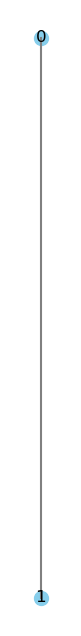

In [245]:
n = 10  
zeta = zeta_critical_example1  

nodes, edges = generate_GW(zeta, n)
print(f'Tree with {nodes} nodes:')
print('Edges:', edges)

import matplotlib.pyplot as plt

def plot_tree(edges):
    def get_positions(node, depth=0, pos={}, x=0, dx=1):
        if node not in pos:
            pos[node] = (x, -depth)
            children = [v for u, v in edges if u == node]
            if children:
                dx = dx / len(children)
                next_x = x - dx * (len(children) - 1) / 2
                for i, child in enumerate(children):
                    pos = get_positions(child, depth + 1, pos, next_x + i * dx, dx)
        return pos
    
    def draw_tree(ax, edges, pos):
        for u, v in edges:
            x_values = [pos[u][0], pos[v][0]]
            y_values = [pos[u][1], pos[v][1]]
            ax.plot(x_values, y_values, 'gray')
        
        for node, (x, y) in pos.items():
            ax.scatter(x, y, c='skyblue', s=100)
            ax.text(x, y, str(node), fontsize=12, ha='center', va='center', color='black')
    
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set_aspect('equal')
    ax.set_axis_off()

    root = 0
    pos = get_positions(root)
    draw_tree(ax, edges, pos)

    plt.show()

plot_tree(edges)

In [262]:
import math

zeta = [0, 1]

for n in range(3, 11):
    zeta = [0, 1]
    nodes, edges = generate_GW(zeta, int(n))
    n = nodes
    nodes = list(range(nodes))
    if burning_number(nodes, edges) > math.ceil(math.sqrt(n)):
        plot_tree(edges)

    # print(f'We have {n} nodes, with these edges: {edges}')
    # print(f'We have the burning number of: {burning_number(nodes, edges)}')

    # plot_tree(edges)
    

It's a path!
It's a path!
It's a path!
It's a path!
It's a path!
It's a path!
It's a path!
It's a path!
